In [79]:
# import necessary modules
# /Users/brendazhou/.local/lib/python3.8/site-packages
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
from scipy.optimize import fsolve
import math
from classy import Class

In [80]:
# esthetic definitions for the plots
font = {'size'   : 16, 'family':'STIXGeneral'}
axislabelfontsize='large'
matplotlib.rc('font', **font)
matplotlib.mathtext.rcParams['legend.fontsize']='medium'
plt.rcParams["figure.figsize"] = [8.0,6.0]

In [90]:
var_name = 'log10_axion_ac'
var_min = -4
var_max = var_min + 0.5
var_num = 5
var_legend = 'log10_axion_ac'
var_figname = '2log10_axion_ac'

In [91]:
# var2_name = 'log10_fraction_axion_ac'
# var2_min = -2
# var2_max = var_min + 1.5
# var2_num = 5
# var2_legend = 'log10_fraction_axion_ac'
# var2_figname = '1111log10_fraction_axion_ac'

In [92]:
# var3_name = 'fraction_fld_ac'
# var3_min = -0.06
# var3_max = var_min + 0.05
# var3_num = 5
# var3_legend = 'fraction_fld_ac'
# var3_figname = 'fraction_fld_ac'

 * Compute with log10_axion_ac=-4.000000e+00
 * Compute with log10_axion_ac=-3.875000e+00
 * Compute with log10_axion_ac=-3.750000e+00
 * Compute with log10_axion_ac=-3.625000e+00
 * Compute with log10_axion_ac=-3.500000e+00


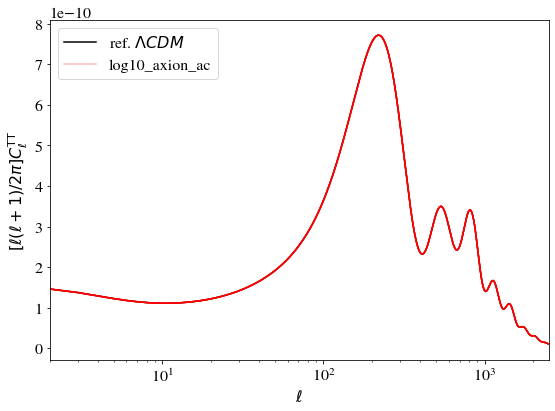

In [95]:
#############################################
#
# Fixed settings
#
common_settings = {'output':'tCl,lCl',
                   "lensing": 'yes',
                   "A_s": 2.187e-9,  
                   'n_s': 0.9696,
                   "h": 0.6837,
                   "omega_b": 0.02242,
                   "omega_cdm": 0.1175,
                   "tau_reio": 0.078,
                   #'Omega_Lambda': 0.7,
                   'Omega_fld': 0,
                   'Omega_scf': 0.01,
                   "n_axion": 3,
                   "scf_tuning_index": 0,
                   "scf_parameters": 1.0e4,
                    "scf_potential": "axion",
                    "log10_fraction_axion_ac": -1.08} # Must input log10(fraction_axion_ac)
#                    "do_shooting": "yes",
#                    "ede_parametrization": "pheno_axion",
#                    "use_ppf": "no",
#                    "use_big_theta_fld": "yes",
#                    "m_axion": 1.811412e+06,
#                    "f_axion": 1,
#
# arrays for output
#
kvec = np.logspace(-4,np.log10(3),1000)
legarray = []
twopi = 2.*math.pi
#
# Create figures
#
fig_TT, ax_TT = plt.subplots()
#
# loop over varying parameter values
#
for i in range(var_num):
    #
    # deal with varying parameters:
    #
    var = var_min + (var_max-var_min)*i/(var_num-1.)
    #var2 = var2_min + (var2_max-var2_min)*i/(var2_num-1.)
    #var3 = var3_min + (var3_max-var3_min)*i/(var3_num-1.)
    #
    print (' * Compute with %s=%e'%(var_name,var))
    #print (' * Compute with %s=%e'%(var2_name,var2))
    #print (' * Compute with %s=%e'%(var3_name,var3))
    #
    # deal with colors and legends
    #
    if i == 0:
        var_color = 'k'
        var_alpha = 1.
        legarray.append(r'ref. $\Lambda CDM$')
    else:
        var_color = 'r'
        var_alpha = 1.*i/(var_num-1.)
    if i == var_num-1:
        legarray.append(var_legend)  
    #    
    # call CLASS
    #
    M = Class()
    M.set(common_settings)
    M.set({var_name:var})
    #M.set({var2_name:var2})
    #M.set({var3_name:var3})
    M.compute()
    #
    # get Cls
    #
    clM = M.lensed_cl(2500)
    ll = clM['ell'][2:]
    clTT = clM['tt'][2:]
    #
    # plot C_l^TT
    #
    ax_TT.semilogx(ll,clTT*ll*(ll+1)/twopi,color=var_color,alpha=var_alpha,linestyle='-')
    #
    # reset CLASS
    #
    M.struct_cleanup()
    
# output of C_l^TT figure
#      
ax_TT.set_xlim([2,2500])
ax_TT.set_xlabel(r'$\ell$')
ax_TT.set_ylabel(r'$[\ell(\ell+1)/2\pi]  C_\ell^\mathrm{TT}$')
ax_TT.legend(legarray)
fig_TT.tight_layout()
fig_TT.savefig('spectra_%s_cltt.pdf' % var_figname)

In [ ]:
# M = {}
# #
# for i in range(var_num):
#     #
#     # deal with varying parameters:
#     #
#     a_c = var_min + (var_max-var_min)*i/(var_num-1.)
#     #
#     log10_axion_ac = math.log(a_c, 10)
    
    
#     print(' * Compute with %s=%e'%('a_c', a_c))
#     #
#     # call CLASS
#     #
#     M[i] = Class()
#     M[i].set(common_settings)
#     M[i].set({'log10_axion_ac':log10_axion_ac})
#     M[i].compute()

In [ ]:
# # VARYING PANN

# for i in range(var_num):
#     #
#     # deal with varying parameters:
#     #
#     var = var_min + (var_max-var_min)*i/(var_num-1.)
#     #
#     print (' * Compute with %s=%e'%(var_name,var))
#     #
#     # deal with colors and legends
#     #
#     if i == 0:
#         var_color = 'k'
#         var_alpha = 1.
#         legarray.append(r'ref. $\Lambda CDM$')
#     else:
#         var_color = 'r'
#         var_alpha = 1.*i/(var_num-1.)
#     if i == var_num-1:
#         legarray.append(var_legend)  
#     #    
#     # call CLASS
#     #
#     M = Class()
#     M.set(common_settings)
#     M.set({var_name:var})
#     M.compute()
#     #
#     # get Cls
#     #
#     clM = M.lensed_cl(2500)
#     ll = clM['ell'][2:]
#     clTT = clM['tt'][2:]
#     #
#     # plot C_l^TT
#     #
#     ax_TT.semilogx(ll,clTT*ll*(ll+1)/twopi,color=var_color,alpha=var_alpha,linestyle='-')
#     #
#     # reset CLASS
#     #
#     M.struct_cleanup()

# #
# # output of C_l^TT figure
# #      
# ax_TT.set_xlim([2,2500])
# ax_TT.set_xlabel(r'$\ell$')
# ax_TT.set_ylabel(r'$[\ell(\ell+1)/2\pi]  C_\ell^\mathrm{TT}$')
# ax_TT.legend(legarray)
# fig_TT.tight_layout()
# fig_TT.savefig('spectra_%s_cltt.pdf' % var_figname)

In [ ]:
# # VARYING NEFF

# ll = {}
# clM = {}
# clTT = {}

# fig_TT, ax_TT = plt.subplots()

# for i in range(var_num):
#     #
#     # deal with varying parameters:
#     #
#     a_c = var_min + (var_max-var_min)*i/(var_num-1.)
#     #
#     # deal with colors and legends
#     #
#     if i == 0:
#         var_color = 'k'
#         var_alpha = 1.
#     else:
#         var_color = plt.cm.Reds(0.8*i/(var_num-1))
#     #
#     # get Cls
#     #
#     clM[i] = M[i].lensed_cl(2500)
#     ll[i] = clM[i]['ell'][2:]
#     clTT[i] = clM[i]['tt'][2:]
#     # plot C_l^TT
#     #
#     if i == 0:
#         ax_TT.semilogx(ll[i],clTT[i]/clTT[0],
#                        color=var_color,alpha=var_alpha,linestyle='-')
#     else:    
#         ax_TT.semilogx(ll[i],clTT[i]/clTT[0],
#                        color=var_color,alpha=var_alpha,linestyle='-',
#                       #label=r'$\Delta N_\mathrm{eff}=%g$'%(N_ur-3.046))

# # output of ClTT figure
# #
# ax_TT.xscale('log')
# ax_TT.xlabel(r'$\mathrm{Multipole} \,\,\,\,  \ell$')
# ax_TT.ylabel(r'$C_\ell^\mathrm{TT}/C_\ell^\mathrm{TT}(N_\mathrm{eff}=3.046)$')
# ax_TT.legend(loc='lower left')
# fig_TT.savefig('ratio-%s-cltt.pdf' % var_figname)

In [ ]:
# from classy import Class
# import matplotlib.pyplot as plt
# from math import pi
# cosmo = Class() 
# params = {'output':'tCl', 
#           "A_s": 2.187e-9,  
#           'n_s': 0.9696,
#           "H0": 68.37,
#           "omega_b": 0.02242,
#           "omega_cdm": 0.1175,
#           "tau_reio": 0.078,}
# #           "log10_axion_ac": -3.728,
# #           #"omega_scf": 0,
# #           "scf_tuning_index": 0,
# #           "scf_parameters": 10.0}
# cosmo.set(params)
# cosmo.compute()
# cls = cosmo.raw_cl()
# ll = cls['ell'][2:]
# clTT = cls['tt'][2:]


In [3]:
# %matplotlib inline
# plt.xscale('log')
# plt.xlabel(r'$\ell$')
# plt.ylabel(r'$[\ell(\ell+1)/2\pi]  C_\ell^\mathrm{TT}$')
# plt.plot(ll,clTT*ll*(ll+1)/2./pi,'r-')